*ANALISIS EXPLORATORIO DE DATOS*

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
request_df = pd.read_csv("//home/biomedmax/github/project-1-ironhack-payments-es/project_dataset/extract - cash request - data analyst.csv")
fees_df = pd.read_csv("//home/biomedmax/github/project-1-ironhack-payments-es/project_dataset/extract - fees - data analyst - .csv")

In [40]:
#Info de la Tabla de Fees
fees_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [41]:
request_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

Conclusion: tenemos columnas con numeros de celdas no-nulas diferentes y DataTypes variados

In [42]:
#Ver si hay algun NaN en la tabla de Requests
request_df_missing = [request_df['created_at'].isna().any()]
request_df_missing

[False]

No hay ningun NaN en la columna de Created_at, que es la que queremos usar como base para cohortes

In [43]:
#Comprobar el formato de Created at
request_df["created_at"]

0        2019-12-10 19:05:21.596873+00
1         2019-12-10 19:50:12.34778+00
2         2019-12-10 19:13:35.82546+00
3        2019-12-10 19:16:10.880172+00
4        2020-05-06 09:59:38.877376+00
                     ...              
23965    2020-10-12 13:54:11.686225+00
23966     2020-10-27 14:41:25.73491+00
23967    2020-10-20 07:58:04.006937+00
23968    2020-10-10 05:40:55.700422+00
23969    2020-10-08 14:16:52.155661+00
Name: created_at, Length: 23970, dtype: object

La columna "Created_at" parece estar toda en formato fecha, pero el python la interpreta como object

In [44]:
#Ejemplo de conversion a DateTime
pd.to_datetime(request_df['created_at'])

0       2019-12-10 19:05:21.596873+00:00
1       2019-12-10 19:50:12.347780+00:00
2       2019-12-10 19:13:35.825460+00:00
3       2019-12-10 19:16:10.880172+00:00
4       2020-05-06 09:59:38.877376+00:00
                      ...               
23965   2020-10-12 13:54:11.686225+00:00
23966   2020-10-27 14:41:25.734910+00:00
23967   2020-10-20 07:58:04.006937+00:00
23968   2020-10-10 05:40:55.700422+00:00
23969   2020-10-08 14:16:52.155661+00:00
Name: created_at, Length: 23970, dtype: datetime64[ns, UTC]

Ahora si es DateTime!
Queremos que todas las columnas sean asi:

Y de paso, hacemos otras conversiones pertinentes



In [45]:
#Crear una copia de mi DF de pagos y transformar todas las columnas a fechas (las que son fechas)
request_df_2 = request_df.copy()

request_df_2['created_at'] = pd.to_datetime(request_df_2['created_at'])
request_df_2['updated_at'] = pd.to_datetime(request_df_2['updated_at'])
request_df_2['moderated_at'] = pd.to_datetime(request_df_2['moderated_at'], errors="coerce")
request_df_2['reimbursement_date'] = pd.to_datetime(request_df_2['reimbursement_date'], errors="coerce")
request_df_2['cash_request_received_date'] = pd.to_datetime(request_df_2['cash_request_received_date'], errors="coerce")
request_df_2['money_back_date'] = pd.to_datetime(request_df_2['money_back_date'], errors="coerce")
request_df_2['send_at'] = pd.to_datetime(request_df_2['send_at'], errors="coerce")
request_df_2['send_at'] = pd.to_datetime(request_df_2['send_at'], errors="coerce")
request_df_2['reco_creation'] = pd.to_datetime(request_df_2['reco_creation'], errors="coerce")
request_df_2['reco_last_update'] = pd.to_datetime(request_df_2['reco_last_update'], errors="coerce")

#Rellenar los NaNs de user ID con los valores de "Deleted Account ID"
request_df_2['user_id'] = request_df_2['user_id'].fillna(request_df_2["deleted_account_id"])

#Convertir los ID a Integers
request_df_2['user_id'] = request_df_2["user_id"].astype("int")

Comprobamos que este todo bien convertido

In [46]:
#Ver info de la DF de Request Payments
request_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     23970 non-null  int64              
 6   moderated_at                15912 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          3050 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             12040 non-null  datetime64[ns,

Si, lo está.

Ahora, queremos ver si hay duplicados en la columna "user_id". Eso significaria que hay users que piden prestamos de manera recurrente

In [47]:
#COmprobar que no hay duplicados de user_id
print(len(request_df_2["user_id"]))
request_df_2.drop_duplicates(subset=["user_id"])
print(len(request_df_2.drop_duplicates(subset=["user_id"])))



23970
11793


Efectivamente.

Ahora, queremos sortear el dataframe en la columna "Created_at"

In [48]:

#Sortear segun fecha de creacion del primer prestamo
request_df_2 = request_df_2.sort_values(["created_at"])

Ahora queremos mirar la base de datos de fees

In [49]:
#Ver si los datos de fees, la columna cash_request_id tiene nans
subset_missing_values = pd.isna(fees_df['cash_request_id'])
subset_missing_values

# Assuming fees_df is your DataFrame
subset_missing_values = fees_df[fees_df['cash_request_id'].isna()]

# Display the subset
print(subset_missing_values)

         id  cash_request_id             type     status category  \
1911   2990              NaN  instant_payment  cancelled      NaN   
1960   3124              NaN  instant_payment  cancelled      NaN   
4605   5185              NaN  instant_payment  cancelled      NaN   
11870  3590              NaN  instant_payment  cancelled      NaN   

       total_amount                              reason  \
1911            5.0  Instant Payment Cash Request 11164   
1960            5.0  Instant Payment Cash Request 11444   
4605            5.0  Instant Payment Cash Request 11788   
11870           5.0  Instant Payment Cash Request 12212   

                          created_at                     updated_at paid_at  \
1911   2020-08-06 22:42:34.525373+00  2020-11-04 16:01:17.296048+00     NaN   
1960   2020-08-08 06:33:06.244651+00  2020-11-04 16:01:08.332978+00     NaN   
4605   2020-08-26 09:39:37.362933+00  2020-11-04 16:01:36.492576+00     NaN   
11870  2020-08-12 14:20:06.657075+00  2020

Vemos que por alguna razon, hay missing values en la columna "cash request id". Como esa columna es importante para hecer join, habra que decidir que hacer con estos valores.

Hemos decidido eliminarlos simplemente, ya que debe de ser una anomalia y son pocos.

In [50]:
#Quitar los NaNs de la columna cash_request_id y ensenarnos la info de Fees
fees_df_2= fees_df.dropna(subset=['cash_request_id'])
fees_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21057 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21057 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21057 non-null  object 
 3   status           21057 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21057 non-null  float64
 6   reason           21057 non-null  object 
 7   created_at       21057 non-null  object 
 8   updated_at       21057 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21057 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.2+ MB


Tranformamos "cash_request_id" en integros

In [51]:
#Transformar la cash_request_id en integers
fees_df_2["cash_request_id"] = fees_df_2['cash_request_id'].astype(int)
fees_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21057 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21057 non-null  int64  
 1   cash_request_id  21057 non-null  int64  
 2   type             21057 non-null  object 
 3   status           21057 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21057 non-null  float64
 6   reason           21057 non-null  object 
 7   created_at       21057 non-null  object 
 8   updated_at       21057 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21057 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.2+ MB


/tmp/ipykernel_23611/2974037321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fees_df_2["cash_request_id"] = fees_df_2['cash_request_id'].astype(int)


Ver cuantos valores diferentes hay en cada columna. Hay cash_request IDs que se repiten mucho

In [52]:
# Ver cuantos valores diferentes hay en cada columna. Hay cash_request IDs que se repiten mucho
columnas_fees = fees_df_2.columns.tolist()
for i in columnas_fees:
    print(f"{fees_df_2[i].value_counts().head(10)}")

id
13301    1
13095    1
4325     1
3107     1
6467     1
6461     1
11489    1
9976     1
4752     1
832      1
Name: count, dtype: int64
cash_request_id
12225    35
5006     28
4410     24
12452    23
11376    21
2358     19
11746    17
15319    16
8713     15
11968    15
Name: count, dtype: int64
type
instant_payment    11095
postpone            7766
incident            2196
Name: count, dtype: int64
status
accepted     14841
cancelled     4934
rejected      1194
confirmed       88
Name: count, dtype: int64
category
rejected_direct_debit     1599
month_delay_on_payment     597
Name: count, dtype: int64
total_amount
5.0     21056
10.0        1
Name: count, dtype: int64
reason
rejected direct debit               1599
month delay on payment - 9/2020      283
month delay on payment - 8/2020      203
month delay on payment - 10/2020     102
Postpone Cash Request 12225           34
Postpone Cash Request 5006            25
Postpone Cash Request 4410            23
Postpone Cash Request 1137

Visualizar la distribucion de algunas de las variables

[Text(0.5, 1.0, 'Distribution of Amount of Cash Requested')]

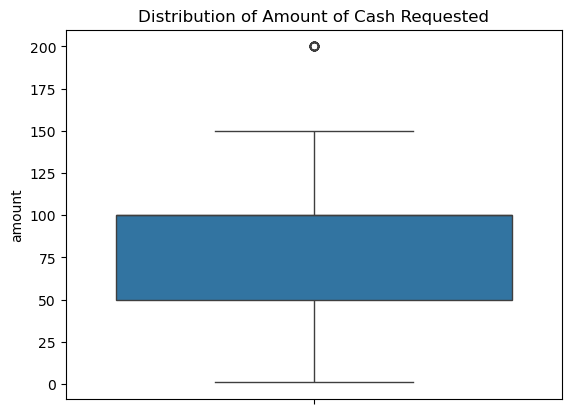

In [53]:
sns.boxplot(request_df_2["amount"]).set(title="Distribution of Amount of Cash Requested")

[Text(0.5, 1.0, 'Distribution of Amount of Fees Requested')]

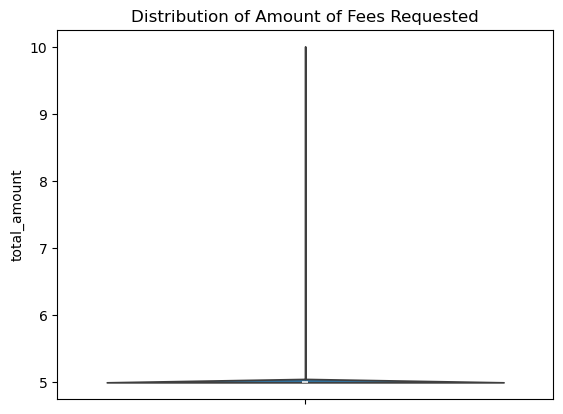

In [54]:
sns.violinplot(fees_df_2["total_amount"]).set(title="Distribution of Amount of Fees Requested")

El ultimo aparece asi porque practicamente todos los fees son 5 y los demas es 10

# Guardamos todo para luego cargar ya los dataframes limpios en la parte de EDA

In [55]:
request_df_2.to_csv(path_or_buf="//home/biomedmax/github/project-1-ironhack-payments-es/project_dataset/filtered_cash")
fees_df_2.to_csv(path_or_buf="//home/biomedmax/github/project-1-ironhack-payments-es/project_dataset/filtered_fees")